<a href="https://colab.research.google.com/github/emersonmrd/imersao_dados/blob/main/Imers%C3%A3o_em_Dados_04_04_Fintech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* <b> CLIENTNUM </b>: Número do cliente. Identificador exclusivo do cliente titular da conta
* <b> Attrition_Flag </b>: Variável de evento interno (atividade do cliente) - se a conta for encerrada, então 1, senão 0
* <b> Customer_Age </b>: Idade do cliente
* <b> Gender </b>: M=Masculino, F=Feminino
* <b> Dependent_count </b>: Número de dependentes
* <b> Education_Level </b>: Nível educacional
* <b> Marital_Status </b>: Casado, Solteiro, Divorciado, Desconhecido
* <b> Income_Category </b>: renda anual
* <b> Card_Category </b>: Variável de Produto - Tipo de Cartão (Azul, Prata, Ouro, Platina)
* <b> Months_on_book </b>: Período de relacionamento com banco
* <b> Total_Relationship_Count </b>: Total não. de produtos detidos pelo cliente
* <b> Months_Inactive_12_mon </b>: Nº de meses inativos nos últimos 12 meses
* <b> Contacts_Count_12_mon </b>: Nº de contatos nos últimos 12 meses
* <b> Credit_Limit </b>: Limite de crédito no cartão de crédito
* <b> Total_Revolving_Bal </b>: Saldo Rotativo Total no Cartão de Crédito
* <b> Avg_Open_To_Buy </b>: Linha de crédito aberta para compra (média dos últimos 12 meses)
* <b> Total_Amt_Chng_Q4_Q1 </b>: Alteração no valor da transação (quarto trimestre em relação ao primeiro trimestre)
* <b> Total_Trans_Amt </b>: Valor total da transação (últimos 12 meses)
* <b> Total_Trans_Ct </b>: Contagem total de transações (últimos 12 meses)
* <b> Total_Ct_Chng_Q4_Q1 </b>: Mudança na contagem de transações (quarto trimestre em relação ao primeiro trimestre)
* <b> Avg_Utilization_Ratio </b>: Taxa média de utilização do cartão





https://www.kaggle.com/code/thomaskonstantin/bank-churn-data-exploration-and-churn-prediction

https://levelup.gitconnected.com/knn-algorithm-in-credit-limit-decision-making-b70f23259912

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

sns.set_style('darkgrid')
plt.rc('figure', figsize=(12, 6) )

In [60]:
Base_Dados = pd.read_csv('BankChurners.csv')
Base_Dados.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [61]:
Base_Dados.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [62]:
# Retirar colunas
Base_Dados.drop(
    columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
    ],
    inplace=True
)

Base_Dados.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

<Axes: >

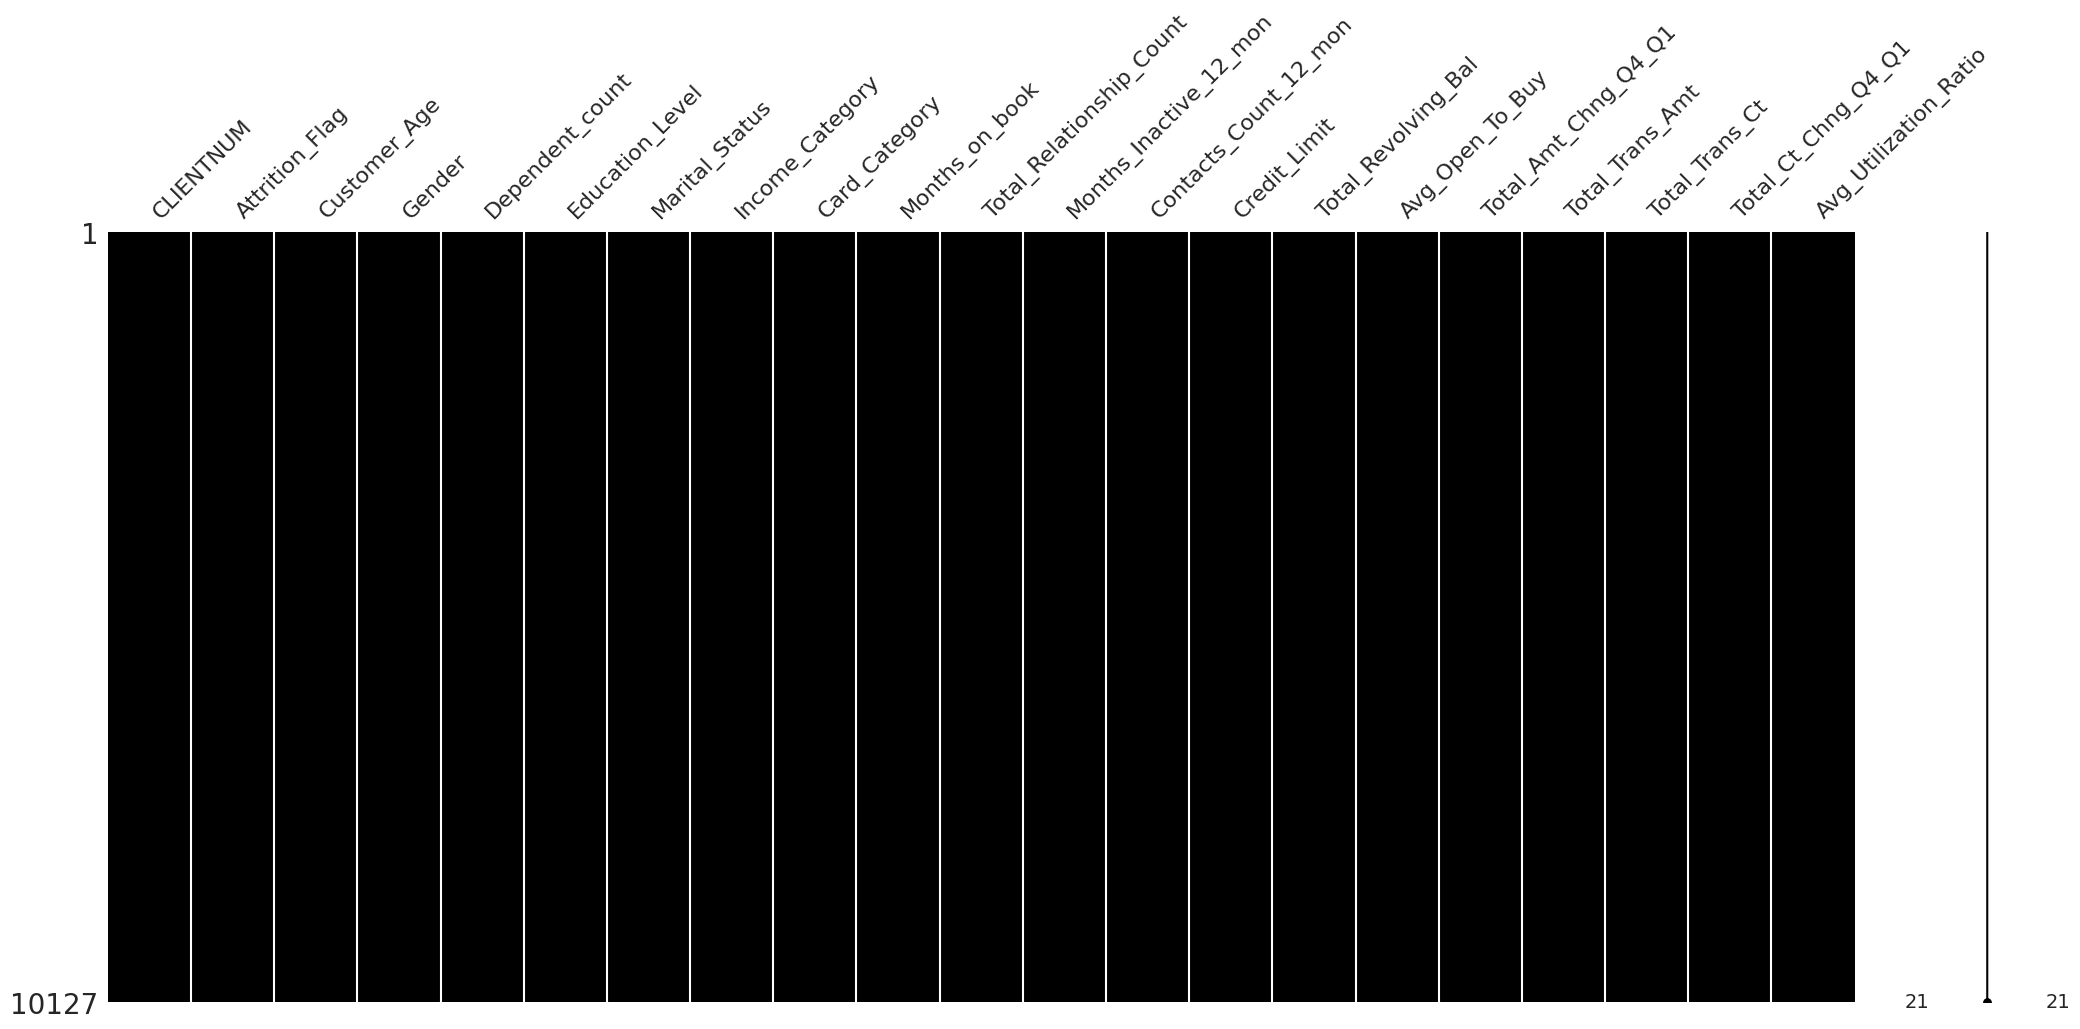

In [11]:
#Visualizing the missing values
import missingno as mn
mn.matrix(Base_Dados, color=(0,0,0) )

In [63]:
Base_Dados.sample(frac=0.02)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
4896,716204883,Existing Customer,53,M,4,College,Unknown,$60K - $80K,Blue,44,...,3,1,7026.0,1728,5298.0,0.669,3935,66,1.000,0.246
7457,717278808,Existing Customer,37,F,3,College,Married,Less than $40K,Blue,28,...,2,1,1788.0,0,1788.0,1.001,3511,56,0.931,0.000
4049,708394908,Existing Customer,44,M,0,High School,Single,$40K - $60K,Blue,33,...,1,3,2337.0,1442,895.0,0.659,3945,65,0.548,0.617
8547,718795083,Existing Customer,44,F,2,Graduate,Married,Unknown,Blue,26,...,1,3,2006.0,1030,976.0,0.881,5337,85,0.735,0.513
10009,719941533,Existing Customer,32,F,1,Graduate,Married,Less than $40K,Blue,20,...,1,4,5497.0,1735,3762.0,0.664,16266,124,0.771,0.316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7916,713782608,Existing Customer,46,F,4,Graduate,Single,$40K - $60K,Blue,36,...,3,1,2652.0,2386,266.0,0.766,5329,83,0.729,0.900
8308,716839983,Existing Customer,48,M,3,College,Married,$120K +,Blue,36,...,3,2,32777.0,0,32777.0,0.665,4520,75,0.923,0.000
5746,720853158,Existing Customer,38,F,3,High School,Single,Unknown,Blue,24,...,3,3,13951.0,1607,12344.0,0.932,4576,70,0.591,0.115
201,771698658,Existing Customer,44,M,5,Graduate,Married,$60K - $80K,Blue,32,...,5,3,11376.0,2006,9370.0,0.619,1302,27,0.800,0.176


In [64]:
for col in Base_Dados.select_dtypes(include='object'):
    print(col)
    print(Base_Dados[col].value_counts())

Attrition_Flag
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
Gender
Gender
F    5358
M    4769
Name: count, dtype: int64
Education_Level
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
Marital_Status
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
Income_Category
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
Card_Category
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


In [65]:
Base_Dados = Base_Dados.replace('Unknown', np.nan)

In [66]:
Base_Dados.isna().sum() / Base_Dados.shape[0] * 100

,0
CLIENTNUM,0.000000
Attrition_Flag,0.000000
Customer_Age,0.000000
Gender,0.000000
Dependent_count,0.000000
Education_Level,14.999506
Marital_Status,7.396070
Income_Category,10.980547
Card_Category,0.000000
Months_on_book,0.000000


In [67]:
Base_Dados.shape

(10127, 21)

In [68]:
# remove missing
Base_Dados = Base_Dados.dropna()

In [69]:
Base_Dados.isna().sum() / Base_Dados.shape[0] * 100

,0
CLIENTNUM,0.0
Attrition_Flag,0.0
Customer_Age,0.0
Gender,0.0
Dependent_count,0.0
Education_Level,0.0
Marital_Status,0.0
Income_Category,0.0
Card_Category,0.0
Months_on_book,0.0


In [70]:
Base_Dados.shape

(7081, 21)

In [71]:
# Plot da Idade
Anl_Idade = make_subplots(rows=2, cols=1)

Plot1=go.Box(
    x=Base_Dados['Customer_Age'],
    name='Idade - Distribuição',
    boxmean=True
)

Plot2=go.Histogram(
    x=Base_Dados['Customer_Age'],
    name='Idade - Histograma'
)

Anl_Idade.add_trace(Plot1, row=1, col=1)
Anl_Idade.add_trace(Plot2, row=2, col=1)

Anl_Idade.update_layout(
    height=700, width=1200,
    title_text="Distribuição da Idade")

Anl_Idade

In [72]:
# plot dos DEPENDENTES
Anl_Dependentes = make_subplots( rows=2, cols=1 )

Plot1 = go.Box(
    x=Base_Dados['Dependent_count'],
    name='Dependentes - Distribuição',
    boxmean=True
)

Plot2 = go.Histogram(
    x=Base_Dados['Dependent_count'],
    name='Dependentes - Histograma'
)

Anl_Dependentes.add_trace(Plot1,row=1,col=1)
Anl_Dependentes.add_trace(Plot2,row=2,col=1)

Anl_Dependentes.update_layout(
    height=700, width=1200,
    title_text="Analise dos dependentes das familias")

Anl_Dependentes.show()

In [73]:
# plot dos DEPENDENTES - Single
base_aux = Base_Dados.query('Marital_Status=="Single"')

Anl_Dependentes = make_subplots( rows=3, cols=1 )

Plot1 = go.Box(
    x=base_aux['Dependent_count'],
    name='Dependentes - Distribuição',
    boxmean=True
)

Plot2 = go.Histogram(
    x=base_aux['Dependent_count'],
    name='Dependentes - Histograma'
)

Plot3 = go.Box(
    x=base_aux['Customer_Age'],
    name='Idade - Distribuição'
)

Anl_Dependentes.add_trace(Plot1,row=1,col=1)
Anl_Dependentes.add_trace(Plot2,row=2,col=1)
Anl_Dependentes.add_trace(Plot3,row=3,col=1)

Anl_Dependentes.update_layout(
    height=700, width=1200,
    title_text="Customer - Single")

Anl_Dependentes.show()

In [74]:
# plot do NÍVEL EDUCACIONAL
px.pie(
    Base_Dados,
    names='Education_Level',
    title='Divisão do nível educacional',
    hole=0.33
)

In [75]:
# Plot nível
px.pie(
    Base_Dados,
    names='Marital_Status',
    title='Distribuição do estado cívil',
    hole=0.33
)

In [76]:
Base_Dados.groupby(['Income_Category','Education_Level'])['CLIENTNUM'].count() / Base_Dados.shape[0] * 100

Income_Category  Education_Level
$120K +          College             0.917949
                 Doctorate           0.494280
                 Graduate            2.796215
                 High School         1.963000
                 Post-Graduate       0.381302
                 Uneducated          1.525208
$40K - $60K      College             2.457280
                 Doctorate           0.946194
                 Graduate            7.188250
                 High School         4.674481
                 Post-Graduate       1.482841
                 Uneducated          3.191640
$60K - $80K      College             1.722920
                 Doctorate           0.748482
                 Graduate            5.465330
                 High School         4.024855
                 Post-Graduate       1.045050
                 Uneducated          2.570258
$80K - $120K     College             2.287812
                 Doctorate           0.776726
                 Graduate            6.284423
                 High School         3.897755
                 Post-Graduate       0.932072
                 Uneducated          2.796215
Less than $40K   College             4.533258
                 Doctorate           2.090100
                 Graduate           14.856659
                 High School         8.784070
                 Post-Graduate       2.245446
                 Uneducated          6.919927
Name: CLIENTNUM, dtype: float64

In [77]:
# Plot da Renda
px.pie(
    Base_Dados,
    names='Income_Category',
    title='Divisão da renda',
    hole=0.33
)

In [78]:
# Plot do Cartões
px.pie(
    Base_Dados,
    names='Card_Category',
    title='Divisão dos diferentes cartões',
    hole=0.33
)

In [79]:
pd.crosstab(Base_Dados['Card_Category'], Base_Dados['Income_Category'], normalize = True)


Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K
Card_Category,,,,,
Blue,0.071741,0.187403,0.142070,0.153651,0.376924
Gold,0.001977,0.001412,0.003107,0.002260,0.002683
Platinum,0.000565,0.000141,0.000424,0.000000,0.000424
Silver,0.006496,0.010451,0.010168,0.013840,0.014264


In [80]:
pd.crosstab(Base_Dados['Card_Category'], Base_Dados['Income_Category'], normalize = False)


Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K
Card_Category,,,,,
Blue,508,1327,1006,1088,2669
Gold,14,10,22,16,19
Platinum,4,1,3,0,3
Silver,46,74,72,98,101


In [81]:
pd.crosstab(Base_Dados['Card_Category'], Base_Dados['Attrition_Flag'], normalize = True)


Attrition_Flag,Attrited Customer,Existing Customer
Card_Category,,
Blue,0.146025,0.785765
Gold,0.001836,0.009603
Platinum,0.000424,0.001130
Silver,0.008897,0.046321


In [82]:
pd.crosstab(Base_Dados['Income_Category'], Base_Dados['Attrition_Flag'], normalize = True)


Attrition_Flag,Attrited Customer,Existing Customer
Income_Category,,
$120K +,0.014405,0.066375
$40K - $60K,0.028809,0.170597
$60K - $80K,0.020477,0.135292
$80K - $120K,0.026691,0.143059
Less than $40K,0.066798,0.327496


In [83]:
Anl_Relacionamento = make_subplots(rows=2, cols=1)

Plot1 = go.Box(
    x=Base_Dados['Months_on_book'],
    name='Relacionamento - Distribuição',
    boxmean=True
)

Plot2 = go.Histogram(
    x=Base_Dados['Months_on_book'],
    name='Relacionamento - Histograma'
)

Anl_Relacionamento.add_trace(Plot1, row=1, col=1)
Anl_Relacionamento.add_trace(Plot2, row=2, col=1)

Anl_Relacionamento.update_layout(
    height=700, width=1200,
    title_text="Análise tempo de relacionamento dos clientes"
)

Anl_Relacionamento

In [84]:
Anl_Produtos_Cliente = make_subplots(rows=2, cols=1)

Plot1 = go.Box(
    x=Base_Dados['Total_Relationship_Count'],
    name='Quantidade de protuos - Distribuição',
    boxmean=True
)

Plot2 = go.Histogram(
    x=Base_Dados['Total_Relationship_Count'],
    name='Quantidade de protuos - Histograma'
)

Anl_Produtos_Cliente.add_trace( Plot1, row=1, col=1 )
Anl_Produtos_Cliente.add_trace( Plot2, row=2, col=1 )

Anl_Produtos_Cliente.update_layout(
    height=700, width=1200,
    title_text="Analise total de produtos dos clientes"
)

Anl_Produtos_Cliente.show()

In [85]:
Anl_Inatividade = make_subplots(rows=2, cols=1)

Plot1 = go.Box(
    x=Base_Dados['Months_Inactive_12_mon'],
    name='Meses de inatividade - Distribuição',
    boxmean=True
)

Plot2 = go.Histogram(
    x=Base_Dados['Months_Inactive_12_mon'],
    name='Meses de inatividade - Histograma'
)

Anl_Inatividade.add_trace(Plot1,row=1,col=1)
Anl_Inatividade.add_trace(Plot2,row=2,col=1)

Anl_Inatividade.update_layout(
    height=700, width=1200,
    title_text="Analise Meses de inatividade"
)

Anl_Inatividade

In [86]:
# Plot do SEXO e CARTÃO
Anl_Sexo_Cartao = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=('','<b>Platinum Card Holders','<b>Blue Card Holders<b>','Residuals'),
    vertical_spacing=0.09,
    specs=[
        [ {"type": "pie","rowspan": 2},{"type": "pie"} ],
        [ None, {"type": "pie"} ],
    ]
)

Anl_Sexo_Cartao.add_trace(
    go.Pie(
        values=Base_Dados.Gender.value_counts().values,
        labels=['<b>Feminino<b>','<b>Masculino<b>'],
        hole=0.3,
        pull=[0,0.3] ),
    row=1, col=1
)

Anl_Sexo_Cartao.add_trace(
    go.Pie(
        labels=['Feminino Platinum Card','Masculino Platinum Card'],
        values=Base_Dados.query('Card_Category=="Platinum"').Gender.value_counts().values,
        pull=[0, 0.05, 0.5],
        hole=0.3

    ),
    row=1, col=2
)

Anl_Sexo_Cartao.add_trace(
    go.Pie(
        labels=['Feminino Blue Card','Masculino Blue Card'],
        values=Base_Dados.query('Card_Category=="Blue"').Gender.value_counts().values,
        pull=[0,0.2,0.5],
        hole=0.3
    ),
    row=2, col=2
)


Anl_Sexo_Cartao.update_layout(
    height=800,
    showlegend=True,
    title_text="<b>Distribuição do sexo e cartões<b>",
)

Anl_Sexo_Cartao

In [87]:
Anl_Valor_Transacoes = make_subplots(rows=2, cols=1)

Plot1 = go.Box(
    x=Base_Dados['Total_Trans_Amt'],
    name='Total de transações - Distribuição',
    boxmean=True
)

Plot2 = go.Histogram(
    x=Base_Dados['Total_Trans_Amt'],
    name='Total de transações - Histograma'
)

Anl_Valor_Transacoes.add_trace(Plot1, row=1, col=1)
Anl_Valor_Transacoes.add_trace(Plot2, row=2, col=1)

Anl_Valor_Transacoes.update_layout(
    height=700, width=1200,
    title_text="Total de transações 12 meses"
)

Anl_Valor_Transacoes.show()

In [88]:
px.pie(
    Base_Dados,
    names='Attrition_Flag',
    title='clientes que abandonam',
    hole=0.33
)

## Data Preprocessing

In [89]:
Base_Dados.dtypes

,0
CLIENTNUM,int64
Attrition_Flag,object
Customer_Age,int64
Gender,object
Dependent_count,int64
Education_Level,object
Marital_Status,object
Income_Category,object
Card_Category,object
Months_on_book,int64


In [90]:
# Ajustar as variaveis categoricas
Base_Dados.Attrition_Flag = Base_Dados.Attrition_Flag.replace( {'Attrited Customer':1, 'Existing Customer':0} )
Base_Dados.Gender = Base_Dados.Gender.replace( {'F':1, 'M':0} )

# Verificando
Base_Dados.head()

<ipython-input-90-4deb2108d25e>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-90-4deb2108d25e>:3: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,0,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,1,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,0,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
4,709106358,0,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,0,44,0,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311


In [91]:
pd.get_dummies( Base_Dados['Education_Level'], drop_first=True )

,Doctorate,Graduate,High School,Post-Graduate,Uneducated
0,False,False,True,False,False
1,False,True,False,False,False
2,False,True,False,False,False
4,False,False,False,False,True
5,False,True,False,False,False
...,...,...,...,...,...
10120,False,False,True,False,False
10121,False,True,False,False,False
10122,False,True,False,False,False
10124,False,False,True,False,False


In [92]:
dummies = pd.get_dummies(Base_Dados['Education_Level'], drop_first=True)
dummies = dummies.astype(int)
dummies


,Doctorate,Graduate,High School,Post-Graduate,Uneducated
0,0,0,1,0,0
1,0,1,0,0,0
2,0,1,0,0,0
4,0,0,0,0,1
5,0,1,0,0,0
...,...,...,...,...,...
10120,0,0,1,0,0
10121,0,1,0,0,0
10122,0,1,0,0,0
10124,0,0,1,0,0


In [93]:
# Convertendo as colunas categóricas para dummies
dummies_education = pd.get_dummies(Base_Dados['Education_Level'], drop_first=True).astype(int)
dummies_income = pd.get_dummies(Base_Dados['Income_Category'], drop_first=True).astype(int)
dummies_marital = pd.get_dummies(Base_Dados['Marital_Status'], drop_first=True).astype(int)
dummies_card = pd.get_dummies(Base_Dados['Card_Category'], drop_first=True).astype(int)

# Concatenando as dummies à base de dados original
Base_Dados = pd.concat([Base_Dados, dummies_education, dummies_income, dummies_marital, dummies_card], axis=1)

# Removendo as colunas originais categóricas, se necessário
Base_Dados.drop(['Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category','CLIENTNUM'], axis=1, inplace=True)

# Exibindo as 5 primeiras linhas
Base_Dados.head()


,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Uneducated,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Married,Single,Gold,Platinum,Silver
0,0,45,0,3,39,5,1,3,12691.0,777,...,0,0,1,0,0,1,0,0,0,0
1,0,49,1,5,44,6,1,2,8256.0,864,...,0,0,0,0,1,0,1,0,0,0
2,0,51,0,3,36,4,1,0,3418.0,0,...,0,0,0,1,0,1,0,0,0,0
4,0,40,0,3,21,5,1,0,4716.0,0,...,1,0,1,0,0,1,0,0,0,0
5,0,44,0,2,36,3,1,2,4010.0,1247,...,0,1,0,0,0,1,0,0,0,0


In [95]:

Anl_Correlacao = make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    subplot_titles=('Correlação de Perason',  'Correlação de Spearman')
)

Cor_Pearson = Base_Dados.corr('pearson')
Cor_Pearson_index = Cor_Pearson.index
Cor_Pearson_colunas = Cor_Pearson.columns
Cor_Pearson_valores = Cor_Pearson.values

Anl_Correlacao.add_trace(
    go.Heatmap(
        x=Cor_Pearson_colunas,
        y=Cor_Pearson_index,
        z=Cor_Pearson_valores,
        name='pearson',
        showscale=False,
        xgap=0.7,
        ygap=0.7),
    row=1, col=1
)

Cor_Spearman = Base_Dados.corr('spearman')
Cor_Spearman_index = Cor_Spearman.index
Cor_Spearman_colunas = Cor_Spearman.columns
Cor_Spearman_valores = Cor_Spearman.values

Anl_Correlacao.add_trace(
    go.Heatmap(
        x=Cor_Spearman_colunas,
        y=Cor_Spearman_index,
        z=Cor_Spearman_valores,
        xgap=0.7,
        ygap=0.7, ),
    row=2, col=1

)
Anl_Correlacao.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)


Anl_Correlacao.update_layout(
    height=700, width=900,
    title_text="Análise de correlação")
Anl_Correlacao.show()

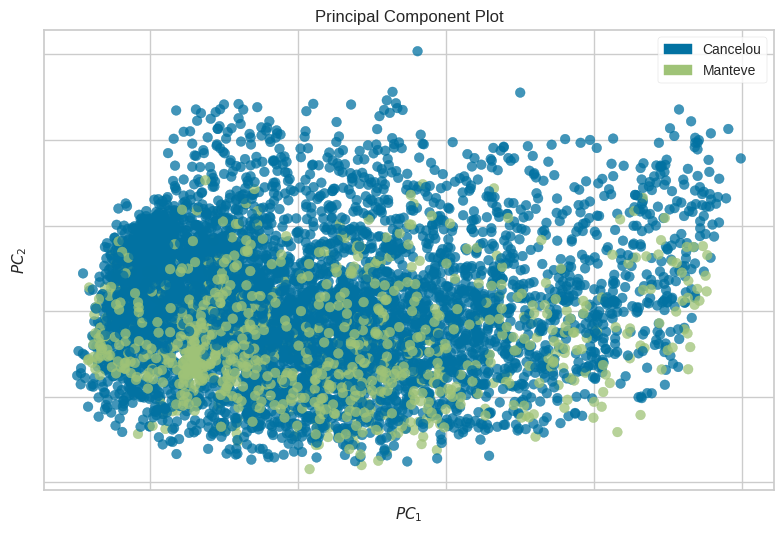

<Axes: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [94]:
from yellowbrick.features import PCA

Eixo_x = Base_Dados.drop( columns='Attrition_Flag' )
Eixo_y = Base_Dados['Attrition_Flag']

Classes = ['Cancelou', 'Manteve']

Anl_PCA = PCA( scale=True, classes=Classes )
Anl_PCA.fit_transform( Eixo_x, Eixo_y )
Anl_PCA.show()

## **Construção do Modelo**

### **Escalonamento dos valores**
<br>
Ajuda a garantir que todas as features estejam na mesma escala, o que permite que o modelo funcione de forma mais eficaz, convergindo mais rapidamente e produzindo resultados mais precisos, evitando distorções devido a diferentes unidades e tamanhos de valores. Além disso, o escalonamento ajuda a reduzir a influência de outliers e facilita a interpretação das importâncias das features.

_________________

**MinMaxScaler**
<br>
é uma técnica de escalonamento usada em pré-processamento de dados em aprendizado de máquina. Ela redimensiona os valores das features em um intervalo específico, geralmente de 0 a 1. O processo é realizado da seguinte maneira:

1. Para cada feature, encontra-se o valor mínimo (min) e o valor máximo (max) no conjunto de dados.
2. Em seguida, para cada valor da feature, subtrai-se o valor mínimo e divide-se pela diferença entre o valor máximo e mínimo (max - min).


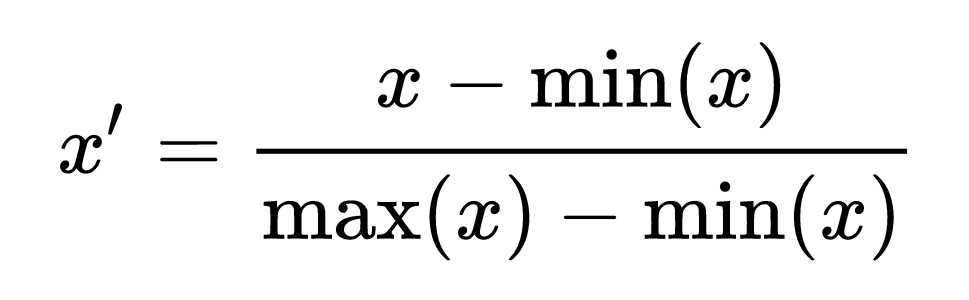

O resultado é que os valores da feature são ajustados para um intervalo entre 0 e 1. Isso é útil para garantir que todas as features estejam na mesma escala, o que é importante para muitos algoritmos de aprendizado de máquina, uma vez que evita que features com escalas diferentes influenciem desproporcionalmente o modelo


In [96]:
# Importar a função
from sklearn.preprocessing import MinMaxScaler

# Definir a função
Funcao_Scaler = MinMaxScaler()

# Treinar o algoritmo
Funcao_Scaler.fit_transform( Base_Dados.drop('Attrition_Flag', axis=1) )

# Converter os valores
Dados_Escalonados = Funcao_Scaler.transform( Base_Dados.drop('Attrition_Flag', axis=1) )

# Verificar
Dados_Escalonados[0:5]

array([[0.40425532, 0.        , 0.6       , 0.60465116, 0.8       ,
        0.16666667, 0.5       , 0.34018992, 0.30870083, 0.34511633,
        0.39299382, 0.03625965, 0.25806452, 0.43753366, 0.06106106,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.4893617 , 1.        , 1.        , 0.72093023, 1.        ,
        0.16666667, 0.33333333, 0.20611167, 0.34326579, 0.21409324,
        0.45363556, 0.04466686, 0.18548387, 1.        , 0.10510511,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 0.        ],
       [0.53191489, 0.        , 0.6       , 0.53488372, 0.6       ,
        0.16666667, 0.        , 0.05984999, 0.        , 0.09894822,
        0.76361495, 0.07875322, 0.08064516, 0.6281637 , 0.        ,
  

### **Dividir os Dados**
<br>
Os dados são divididos em conjuntos de treinamento e teste porque essa divisão permite avaliar o desempenho do modelo em dados não vistos, evitar o overfitting e simular o uso real do modelo. Isso é fundamental para determinar a eficácia do modelo.

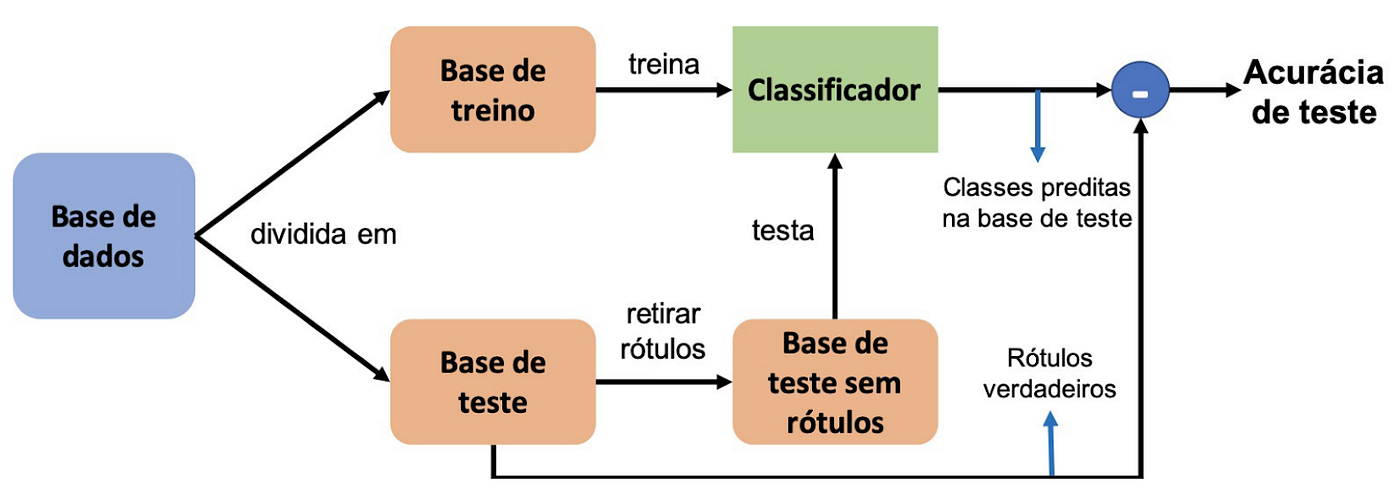

In [97]:
# Separa em Eixo x e Eixo y
Eixo_x = Dados_Escalonados
Eixo_y = Base_Dados['Attrition_Flag']

Eixo_x.shape, Eixo_y.shape

((7081, 29), (7081,))

Split dos dados

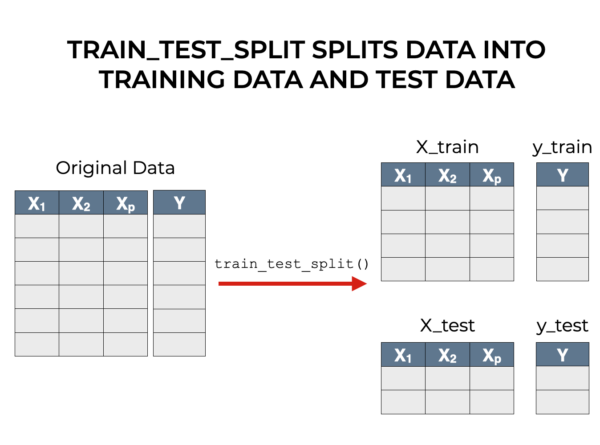

In [98]:
# Função da divisão
from sklearn.model_selection import train_test_split

# Separação em "4 pedações"
X_train, X_test, y_train, y_test = train_test_split(
    Eixo_x,
    Eixo_y,
    test_size=0.3,
    random_state = 99
)

print('Dados de Treino:', X_train.shape, y_train.shape )
print('Dados de Teste:', X_test.shape, y_test.shape )

Dados de Treino: (4956, 29) (4956,)
Dados de Teste: (2125, 29) (2125,)


### **Algoritmo: DecisionTreeClassifier**

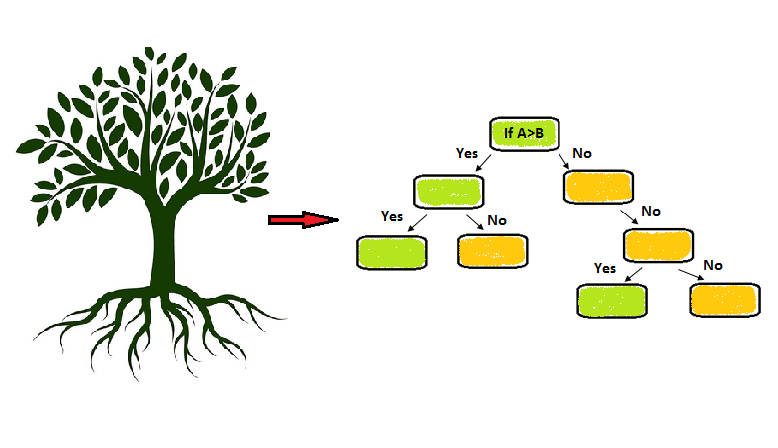

In [99]:
# Função
from sklearn.tree import DecisionTreeClassifier

# Setando o algoritmo/modelo
Algoritmo_Arvore = DecisionTreeClassifier( max_depth=5 )

# Fitar/Treinar o modelo/algoritmo
Algoritmo_Arvore.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [100]:
# Previsões para fazer os teste do modelo
y_pred = Algoritmo_Arvore.predict( X_test )

print('Precisões do Algortiimo:', y_pred[0:10] )
print('Valores reais:', y_test[0:10].values )

Precisões do Algortiimo: [0 0 0 0 0 0 0 1 0 0]
Valores reais: [0 0 0 0 0 0 0 1 0 0]


**Avaliação do modelo**

In [101]:
from sklearn.metrics import confusion_matrix
print( confusion_matrix(y_test, y_pred)  )

[[1717   64]
 [  61  283]]


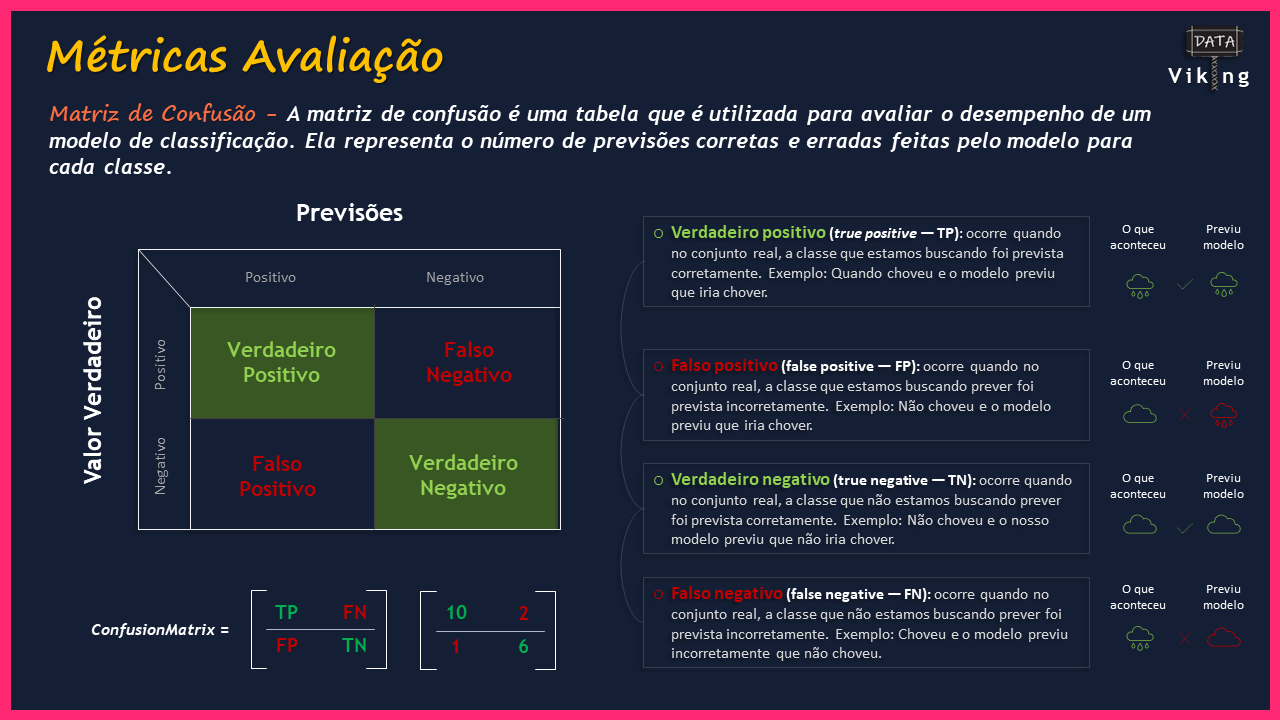

In [102]:
from sklearn.metrics import classification_report
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1781
           1       0.82      0.82      0.82       344

    accuracy                           0.94      2125
   macro avg       0.89      0.89      0.89      2125
weighted avg       0.94      0.94      0.94      2125



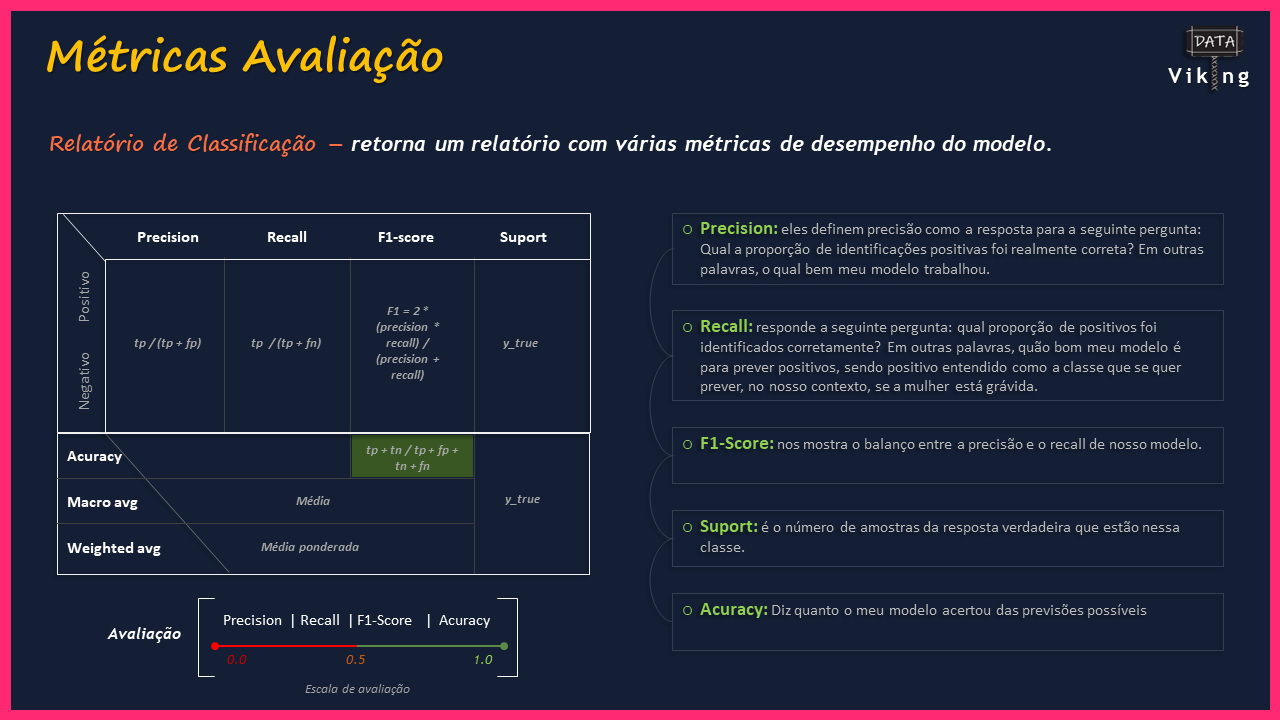

0.9289411764705883

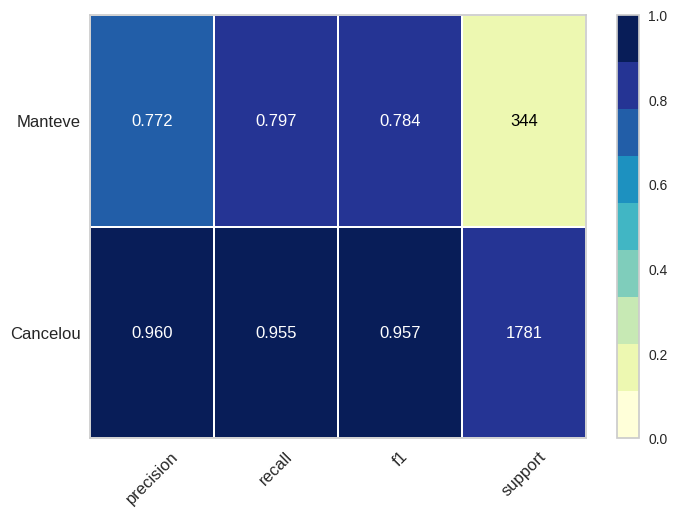

In [103]:
# Função
from yellowbrick.classifier import ClassificationReport

# Classe
Classes = ['Manteve', 'Cancelou']

# Instanciar o algorimto
visualizer = ClassificationReport(DecisionTreeClassifier(), classes=Classes, support=True, cmap='YlGnBu')

# Fitar
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)

0.9331764705882353

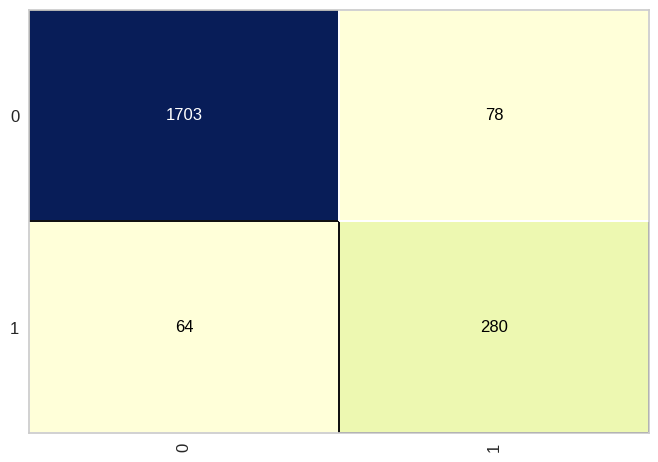

In [104]:
from yellowbrick.classifier import ConfusionMatrix
CM = ConfusionMatrix(DecisionTreeClassifier(), classes=[0, 1], cmap='YlGnBu')
CM.fit(X_train, y_train)
CM.score(X_test, y_test)

<Axes: >

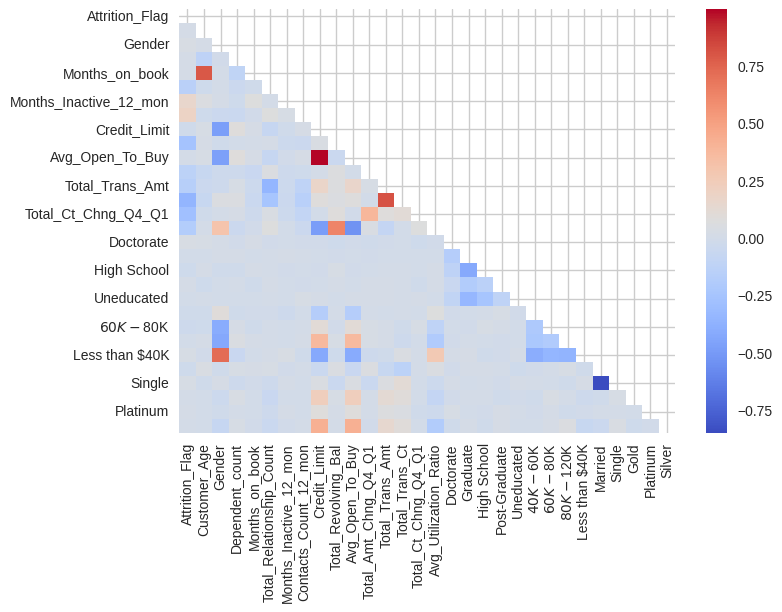

In [105]:
Correlacao = Base_Dados.corr()
Mascara = np.triu( np.ones_like(Correlacao, dtype=bool))
sns.heatmap(Correlacao, mask=Mascara, cmap='coolwarm', annot=False, linewidths=0)

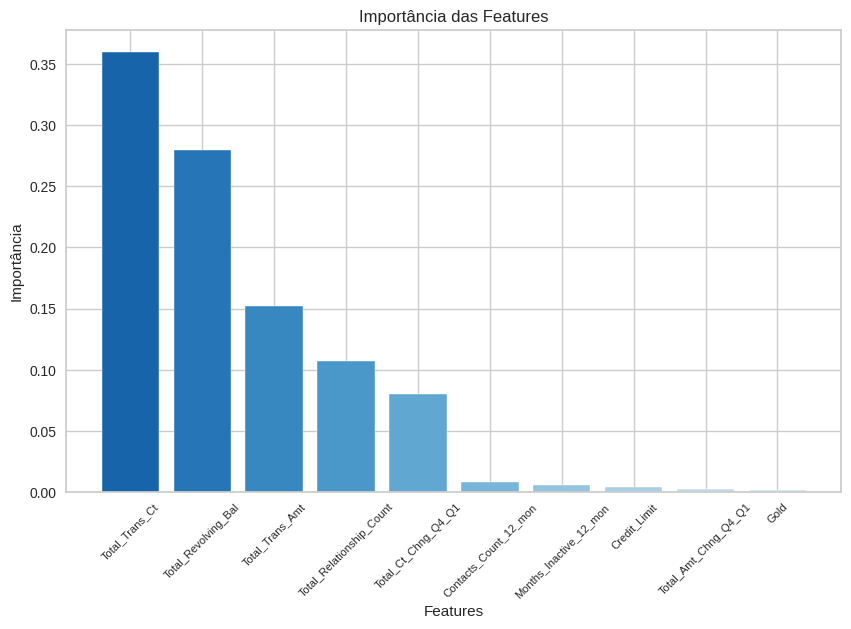

In [106]:
Dicionario = {
    'Features' : Base_Dados.drop('Attrition_Flag', axis=1).columns,
    'Rannking' : Algoritmo_Arvore.feature_importances_
}

DF_Features = pd.DataFrame( Dicionario )
DF_Features.sort_values( by='Rannking', ascending=False, inplace=True )
DF_Features = DF_Features[ DF_Features.Rannking > 0 ]


# Definir uma paleta de cores em tons de azul
Paleta_Azul = plt.cm.Blues(np.linspace(0.8, 0.2, len(DF_Features.Rannking.unique())))

plt.figure( figsize=(10, 6) )
plt.bar( DF_Features.Features, DF_Features.Rannking, color=Paleta_Azul )
plt.xticks(rotation=45, size=8)
plt.xlabel('Features')
plt.ylabel('Importância')
plt.title('Importância das Features')
plt.show()

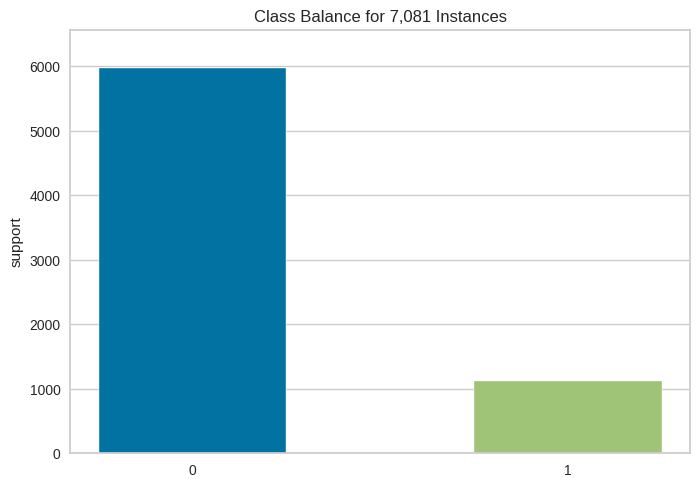

<Axes: title={'center': 'Class Balance for 7,081 Instances'}, ylabel='support'>

In [107]:
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=['0', '1'])
visualizer.fit(Eixo_y)
visualizer.show()

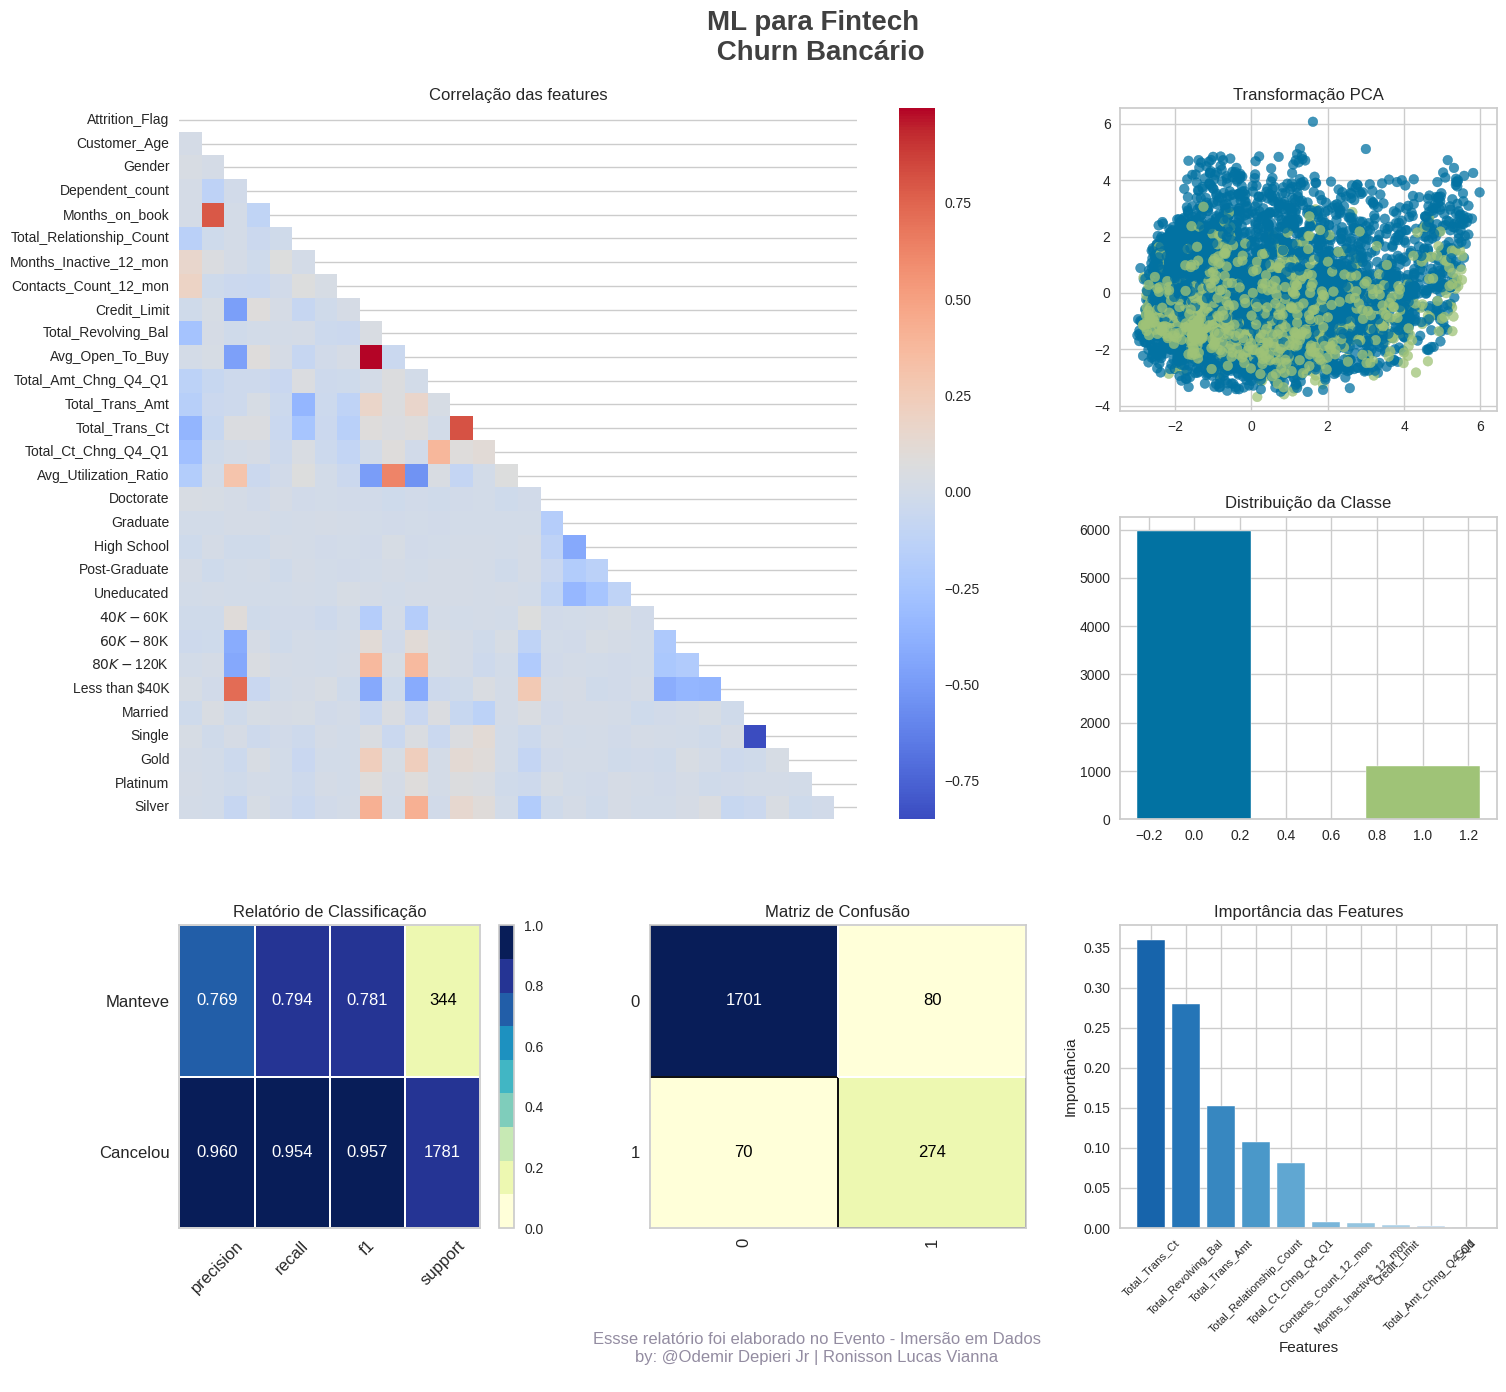

In [108]:
Produto = plt.figure( figsize=(17, 14) )

# Titulo da figura
plt.suptitle('ML para Fintech \n Churn Bancário', fontsize=20, color='#404040', fontweight=600 )

# Lista com os eixos
Eixos = [ None for Loop in range(10) ]

Estrutura_Grid = (3, 3)

Eixos[3] = plt.subplot2grid( Estrutura_Grid, (0, 0), colspan=2, rowspan=2 )
plt.title('Correlação das features')
Correlacao = Base_Dados.corr()
Mascara = np.triu( np.ones_like(Correlacao, dtype=bool))
sns.heatmap(Correlacao, mask=Mascara, cmap='coolwarm', annot=False, linewidths=0)
plt.xticks([])

Eixos[4] = plt.subplot2grid( Estrutura_Grid, (0, 2), colspan=1, rowspan=1 )
plt.title('Transformação PCA')
Eixo_x = Base_Dados.drop( columns='Attrition_Flag' )
Eixo_y = Base_Dados['Attrition_Flag']
Classes = ['Cancelou', 'Manteve']
Anl_PCA = PCA( scale=True, classes=Classes )
Anl_PCA.fit_transform( Eixo_x, Eixo_y )

Eixos[5] = plt.subplot2grid( Estrutura_Grid, (1, 2), colspan=1, rowspan=1 )
plt.title('Distribuição da Classe')
visualizer = ClassBalance(labels=['0', '1'])
visualizer.fit(Eixo_y)

Eixos[0] = plt.subplot2grid( Estrutura_Grid, (2, 0), colspan=1 )
plt.title('Relatório de Classificação')
Classes = ['Manteve', 'Cancelou']
ClassReport = ClassificationReport(DecisionTreeClassifier(), classes=Classes, support=True, cmap='YlGnBu')
ClassReport.fit(X_train, y_train)
ClassReport.score(X_test, y_test)

Eixos[1] = plt.subplot2grid( Estrutura_Grid, (2, 1), colspan=1 )
plt.title('Matriz de Confusão')
CM = ConfusionMatrix( DecisionTreeClassifier(), classes=[0, 1], cmap='YlGnBu' )
CM.fit(X_train, y_train)
CM.score(X_test, y_test)

Eixos[2] = plt.subplot2grid( Estrutura_Grid, (2, 2), colspan=1 )
plt.bar( DF_Features.Features, DF_Features.Rannking, color=Paleta_Azul )
plt.xticks(rotation=45, size=8)
plt.xlabel('Features')
plt.ylabel('Importância')
plt.title('Importância das Features')

# Ajustar o layout
plt.subplots_adjust( hspace=0.35, wspace=0.25, top=0.91 )

# Rodapé
Rodape = '''
Essse relatório foi elaborado no Evento - Imersão em Dados
by: @Odemir Depieri Jr | Ronisson Lucas Vianna
'''

# Incluindo o rodape no relatorio
Produto.text( 0.5, 0, Rodape, ha='center', va='bottom', size=12, color='#938ca1');